# Exercise Seven: Textual Analysis

This notebook provides a model for initial textual analysis of a multi-document corpus.

Your workflow should:
- Import at least three documents you would like to compare (from text files, or using another format for a challenge.)
- Preprocess the text and create a tokenized corpus from the text of the imported documents.
- Create a document term matrix to enable comparative textual analysis across the full set of documents
- Chart at least one comparison between the documents, using word frequency to map the text
- Calculate the Euclidean distance between the documents, using two key words as the point of comparison 

As a bonus challenge, consider trying one of the other types of distance modeling described in the text.

## Stage One. Imports Documents from Folder

In [3]:
import nltk
import nltk.tokenize

# download the most recent punkt package
nltk.download('punkt', quiet=True)

import os
documents = []
titles =[]
path = 'texts/'
with os.scandir(path) as entries:
    for entry in entries:
        print(entry.name)
        f = open(f'{path}\{entry.name}',encoding='utf-8')
        text = f.read()
        documents.append(text)
        titles.append(entry.name)
print(titles[1])
print(documents[1][0:100])

carpentry.txt
household.txt
quilts.txt
radio.txt
soap.txt
household.txt
﻿The Project Gutenberg eBook, The Book of Household Management, by Mrs.
Isabella Beeton


This eBook


## Stage Two. Preprocess the Corpus

In [4]:
import re
PUNCT_RE = re.compile(r'[^\w\s]+$')

def is_punct(string):
    """Check if STRING is a punctuation marker or a sequence of
       punctuation markers.
    """
    return PUNCT_RE.match(string) is not None
def preprocess_text(text, language, lowercase=True):
    """Preprocess a text.

    Perform a text preprocessing procedure, which transforms a string
    object into a list of word tokens without punctuation markers.

    """
    if lowercase:
        text = text.lower()
    tokens = nltk.tokenize.word_tokenize(text, language=language)
    tokens = [token for token in tokens if not is_punct(token)]
    return tokens
tokenized = []
for text in documents:
    tokenized.append(preprocess_text(text, "english"))

print(tokenized[0][11])

zerbe


## Stage Three: Create a Document Term Matrix

In [5]:
def extract_vocabulary(tokenized_corpus, min_count=1, max_count=float('inf')):
    """Extract a vocabulary from a tokenized corpus.

    Arguments:
        tokenized_corpus (list): a tokenized corpus represented, list
            of lists of strings.
        min_count (int, optional): the minimum occurrence count of a
            vocabulary item in the corpus.
        max_count (int, optional): the maximum occurrence count of a
            vocabulary item in the corpus. Defaults to inf.

    Returns:
        list: An alphabetically ordered list of unique words in the
            corpus, of which the frequencies adhere to the specified
            minimum and maximum count.

    Examples:
        >>> corpus = [['the', 'man', 'love', 'man', 'the'],
                      ['the', 'love', 'book', 'wise', 'drama'],
                      ['a', 'story', 'book', 'drama']]
        >>> extract_vocabulary(corpus, min_count=2)
        ['book', 'drama', 'love', 'man', 'the']

    """
    vocabulary = collections.Counter()
    for document in tokenized_corpus:
        vocabulary.update(document)
    vocabulary = {word for word, count in vocabulary.items()
                  if count >= min_count and count <= max_count}
    return sorted(vocabulary)
import collections
vocabulary = extract_vocabulary(tokenized, min_count=2)
print(vocabulary[0:100])

def corpus2dtm(tokenized_corpus, vocabulary):
    """Transform a tokenized corpus into a document-term matrix.

    Arguments:
        tokenized_corpus (list): a tokenized corpus as a list of
        lists of strings. vocabulary (list): An list of unique words.

    Returns:
        list: A list of lists representing the frequency of each term
              in `vocabulary` for each document in the corpus.

    Examples:
        >>> tokenized_corpus = [['the', 'man', 'man', 'smart'],
                                ['a', 'the', 'man' 'love'],
                                ['love', 'book', 'journey']]
        >>> vocab = ['book', 'journey', 'man', 'love']
        >>> corpus2dtm(tokenized_corpus, vocabulary)
        [[0, 0, 2, 0], [0, 0, 1, 1], [1, 1, 0, 1]]

    """
    document_term_matrix = []
    for document in tokenized_corpus:
        document_counts = collections.Counter(document)
        row = [document_counts[word] for word in vocabulary]
        document_term_matrix.append(row)
    return document_term_matrix

import numpy as np

document_term_matrix = np.array(corpus2dtm(tokenized, vocabulary))

["'and", "'as-is", "'cafe", "'d", "'die", "'if", "'it", "'ll", "'my", "'oh", "'s", "'the", "'they", "'ve", "'what", "'yes", "'you", '***end', '***start', '*quantities', '*table', '*the', '-10°', '-12', '-16', '-16°', '-17°', '-18°', '-20', '-27°', '-2°', '-3°', '-4', '-8', '-the', '..double', '..new', '..single', '.0005', '.0007', '.001', '.002', '.007', '.4886', '//gutenberg.org/license', '//pglaf.org', '//pglaf.org/donate', '//pglaf.org/fundraising', '//www.gutenberg.org', '//www.gutenberg.org/fundraising/donate', '//www.pgdp.net', '//www.pglaf.org', '0', '0.00111800', '0.004064', '0.01', '0.02', '0.04', '0.05', '0.1', '0.15', '0.2', '0.25', '0.3', '0.5', '0.505', '0.75', '0.861', '0.867', '0.871', '0.873', '0.875', '0.914-0.916|', '0.914-0.917|', '0.916-0.920|', '0.924-0.927|', '0.925-0.926|', '0.931-0.938|', '0°', '1', '1,000', '1,000,000', '1,100', '1,200', '1,200,000', '1,400', '1,500', '1,600', '1-1/2', '1-1/2-pint', '1-1/2d', '1-1/4', '1-10', '1-2', '1-3', '1-3/4', '1-3/8', '1-

## Stage Four: Chart a Comparison

She: [  0 366  79   0   0]
He: [ 32 610  32  15  16]
They: [  50 1825  101  111   60]


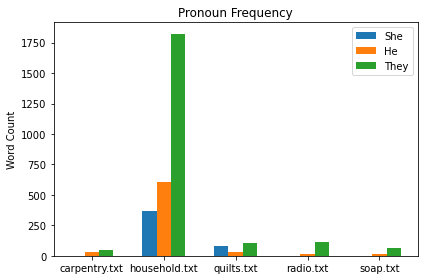

In [6]:
girl_id = vocabulary.index('she')
boy_id = vocabulary.index('he')
they_id = vocabulary.index('they')

girl_counts = document_term_matrix[:, girl_id]
boy_counts = document_term_matrix[:, boy_id]
they_counts = document_term_matrix[:, they_id]
print("She: " + str(girl_counts))
print("He: " + str(boy_counts))
print("They: " + str(they_counts))
import matplotlib.pyplot as plt

x = np.arange(len(titles))
width = 1/(len(titles))

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, girl_counts, width, label='She')
rects2 = ax.bar(x, boy_counts, width, label='He')
rects3 = ax.bar(x + width, they_counts, width, label='They')


ax.set_ylabel('Word Count')
ax.set_title('Pronoun Frequency')
ax.set_xticks(x)
ax.set_xticklabels(titles)
ax.legend()

fig.tight_layout()

plt.show()

In [9]:
def euclidean_distance(a, b):
    """Compute the Euclidean distance between two vectors.

    Note: ``numpy.linalg.norm(a - b)`` performs the
    same calculation using a slightly faster method.

    Arguments:
        a (numpy.ndarray): a vector of floats or ints.
        b (numpy.ndarray): a vector of floats or ints.

    Returns:
        float: The euclidean distance between vector a and b.

    Examples:
        >>> import numpy as np
        >>> a = np.array([1, 4, 2, 8])
        >>> b = np.array([2, 1, 4, 7])
        >>> round(euclidean_distance(a, b), 2)
        3.87

    """
    return np.sqrt(np.sum((a - b) ** 2))
vectors = []
for x in range(0, len(titles)):
    vectors.append([they_counts[x],boy_counts[x]])

for x in range(0, len(vectors)):
    for y in range(x+1, len(vectors)):
        comparison = euclidean_distance(np.array(vectors[x]),np.array(vectors[y]))
        print(f'{titles[x]} vs {titles[y]}: {comparison}')


carpentry.txt vs household.txt: 1866.7375284168902
carpentry.txt vs quilts.txt: 51.0
carpentry.txt vs radio.txt: 63.324560795950255
carpentry.txt vs soap.txt: 18.867962264113206
household.txt vs quilts.txt: 1818.3124044013998
household.txt vs radio.txt: 1814.3376201798826
household.txt vs soap.txt: 1862.273073423981
quilts.txt vs radio.txt: 19.72308292331602
quilts.txt vs soap.txt: 44.01136216933077
radio.txt vs soap.txt: 51.0098029794274
